In [1]:
import numpy as np
import pandas
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.curdir, '..'))
from support.mecanum_calculations import *
from support.pd_support import *

In [2]:
_folder_name = "sk21_forward_t0"
_parent_folder_name = "sensor_jan_13_2023"

_base_pth = os.path.dirname(os.getcwd())
_base_pth = os.path.join(_base_pth, 'recording_programs', "test_data",_parent_folder_name)
_base_pth


'c:\\Users\\Sujith\\Documents\\Projects\\armbo\\recording_programs\\test_data\\sensor_jan_13_2023'

In [3]:
_sensor_pth = os.path.join(_base_pth, _folder_name, "imu01.csv")
_mc_pth = os.path.join(_base_pth, "sk21",_folder_name + ".csv")
_mc_pth

'c:\\Users\\Sujith\\Documents\\Projects\\armbo\\recording_programs\\test_data\\sensor_jan_13_2023\\sk21\\sk21_forward_t0.csv'

In [4]:
sk_df = pd.read_csv(_sensor_pth)
mc_df, st_time = read_rigid_body_csv(_mc_pth)
mc_df = add_datetime_col(mc_df, st_time,_name="seconds")

radius = 47.5/1000
lx = 79 #half of the distance between the wheels
ly = 122.5/2

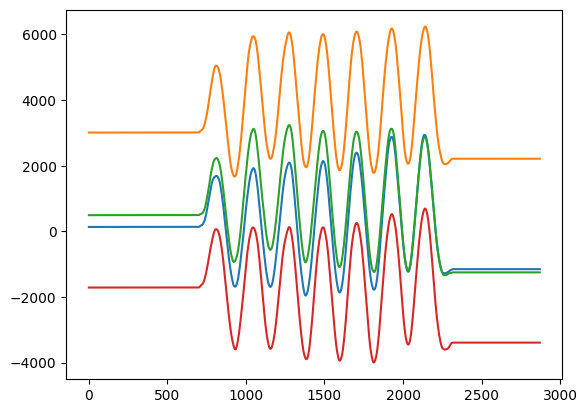

In [5]:
plt.plot(sk_df["e_fr"])
plt.plot(sk_df["e_fl"])
plt.plot(sk_df["e_rr"])
plt.plot(sk_df["e_rl"])

In [6]:
_sk_df = set_zero(sk_df)
_sk_df, _ang_column = get_angular_velocity(_sk_df)
_sk_df, _ = get_directional_velocity(_sk_df, _ang_column, radius, lx, ly)
_sk_df, _ = get_position(_sk_df)
_sk_df["sys_time"] = pd.to_datetime(_sk_df["sys_time"])

In [10]:
mc_df["time"]

0      2023-01-13 16:45:14.998
1      2023-01-13 16:45:15.008
2      2023-01-13 16:45:15.018
3      2023-01-13 16:45:15.028
4      2023-01-13 16:45:15.038
                 ...          
2402   2023-01-13 16:45:39.018
2403   2023-01-13 16:45:39.028
2404   2023-01-13 16:45:39.038
2405   2023-01-13 16:45:39.048
2406   2023-01-13 16:45:39.058
Name: time, Length: 2407, dtype: datetime64[ns]

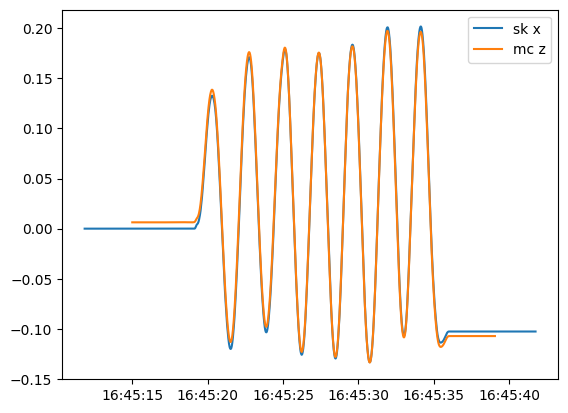

In [27]:
plt.plot(_sk_df["sys_time"], _sk_df['x_val'], label = "sk x")
plt.plot(mc_df["time"], mc_df['m4_z'], label = "mc z")
plt.legend()

In [ ]:
plt.plot(mc_df["time"], mc_df['m1_x'], label = "mc x")
plt.plot(mc_df["time"], mc_df['m1_y'], label = "mc y")
plt.plot()
